In [ ]:
# imports
import os.path
from typing import Dict, Tuple
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Path where data is located
DATA_ABS_PATH = 'drive/My Drive/Colab Notebooks/Dataset/'


# Function wrapping up tasks of creating dataset
def get_full_dataset(
    batch_size: int = 32, image_size: Tuple[int, int] = (256, 256)
) -> tf.data.Dataset:

    # read in data 
    data = pd.read_csv(os.path.join(DATA_ABS_PATH, "CD.csv"))
    images_path = os.path.join(DATA_ABS_PATH, "Dataset/")

    # add pictures to csv
    data["Picture"] = data["Picture"].map(lambda x: os.path.join(images_path, f"{x}"))
    filenames: tf.Tensor = tf.constant(data["Picture"], dtype=tf.string)
    
    # Helper Function 
    def labelling(data, label): 
      data[label] = data[label].str.lower()
      class_name_to_label: Dict[str, int] = {
          label: i for i, label in enumerate(set(data[label]))
      }
      
      labels: tf.Tensor = tf.constant(
          data[label].map(class_name_to_label.__getitem__), dtype=tf.uint8
      )
      return labels

    # get labels
    label1 = labelling(data, "Kind of bottle ")
    label2 = labelling(data, "Liquid")
    label3 = labelling(data, "Drinkable")
    
    # put everything into a dataset
    dataset = tf.data.Dataset.from_tensor_slices((filenames, label1, label2, label3))

    def _parse_function(filename, label1, label2, label3):
        jpg_image: tf.Tensor = tf.io.decode_jpeg(tf.io.read_file(filename))
        return tf.image.resize(jpg_image, size=image_size), label1, label2, label3

    dataset = dataset.map(_parse_function)
    return dataset.batch(batch_size)

In [ ]:
# load dataset
dataset = get_full_dataset(32,(900, 600))

##Display Examples

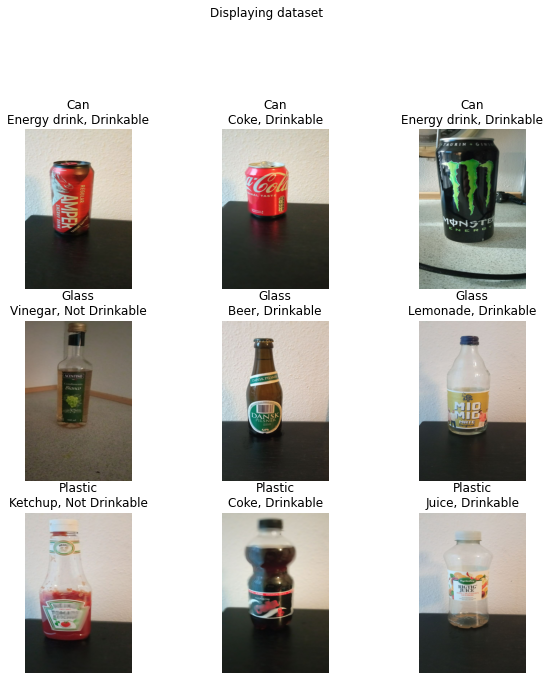

In [ ]:
# Names
kind_names = ["Glass", "Plastic", "Can"]
liquid_names = ['Wodka', 'Energy drink', 'Oatmilk', 'Juice', 'Oyster sauce', 'Coke', 'Ingwer shot', 'Oil', 'Water', 'Ketchup', 'Vinegar', 'Wine', 'Fanta', 'Lemonade', 'Beer']
drinkable_names =["Drinkable", "Not Drinkable"]

# loop through dataset and display a few examples of the dataset
for image, label1, label2, label3 in dataset.take(1):
  for i in range(9): 
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    subt= liquid_names[label2[i]] + ", " + drinkable_names[label3[i]]
    plt.title(kind_names[label1[i]] + "\n"+ subt)
    plt.suptitle("Displaying dataset" , y=1.05)
    plt.axis("off")
    


# Display the whole dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


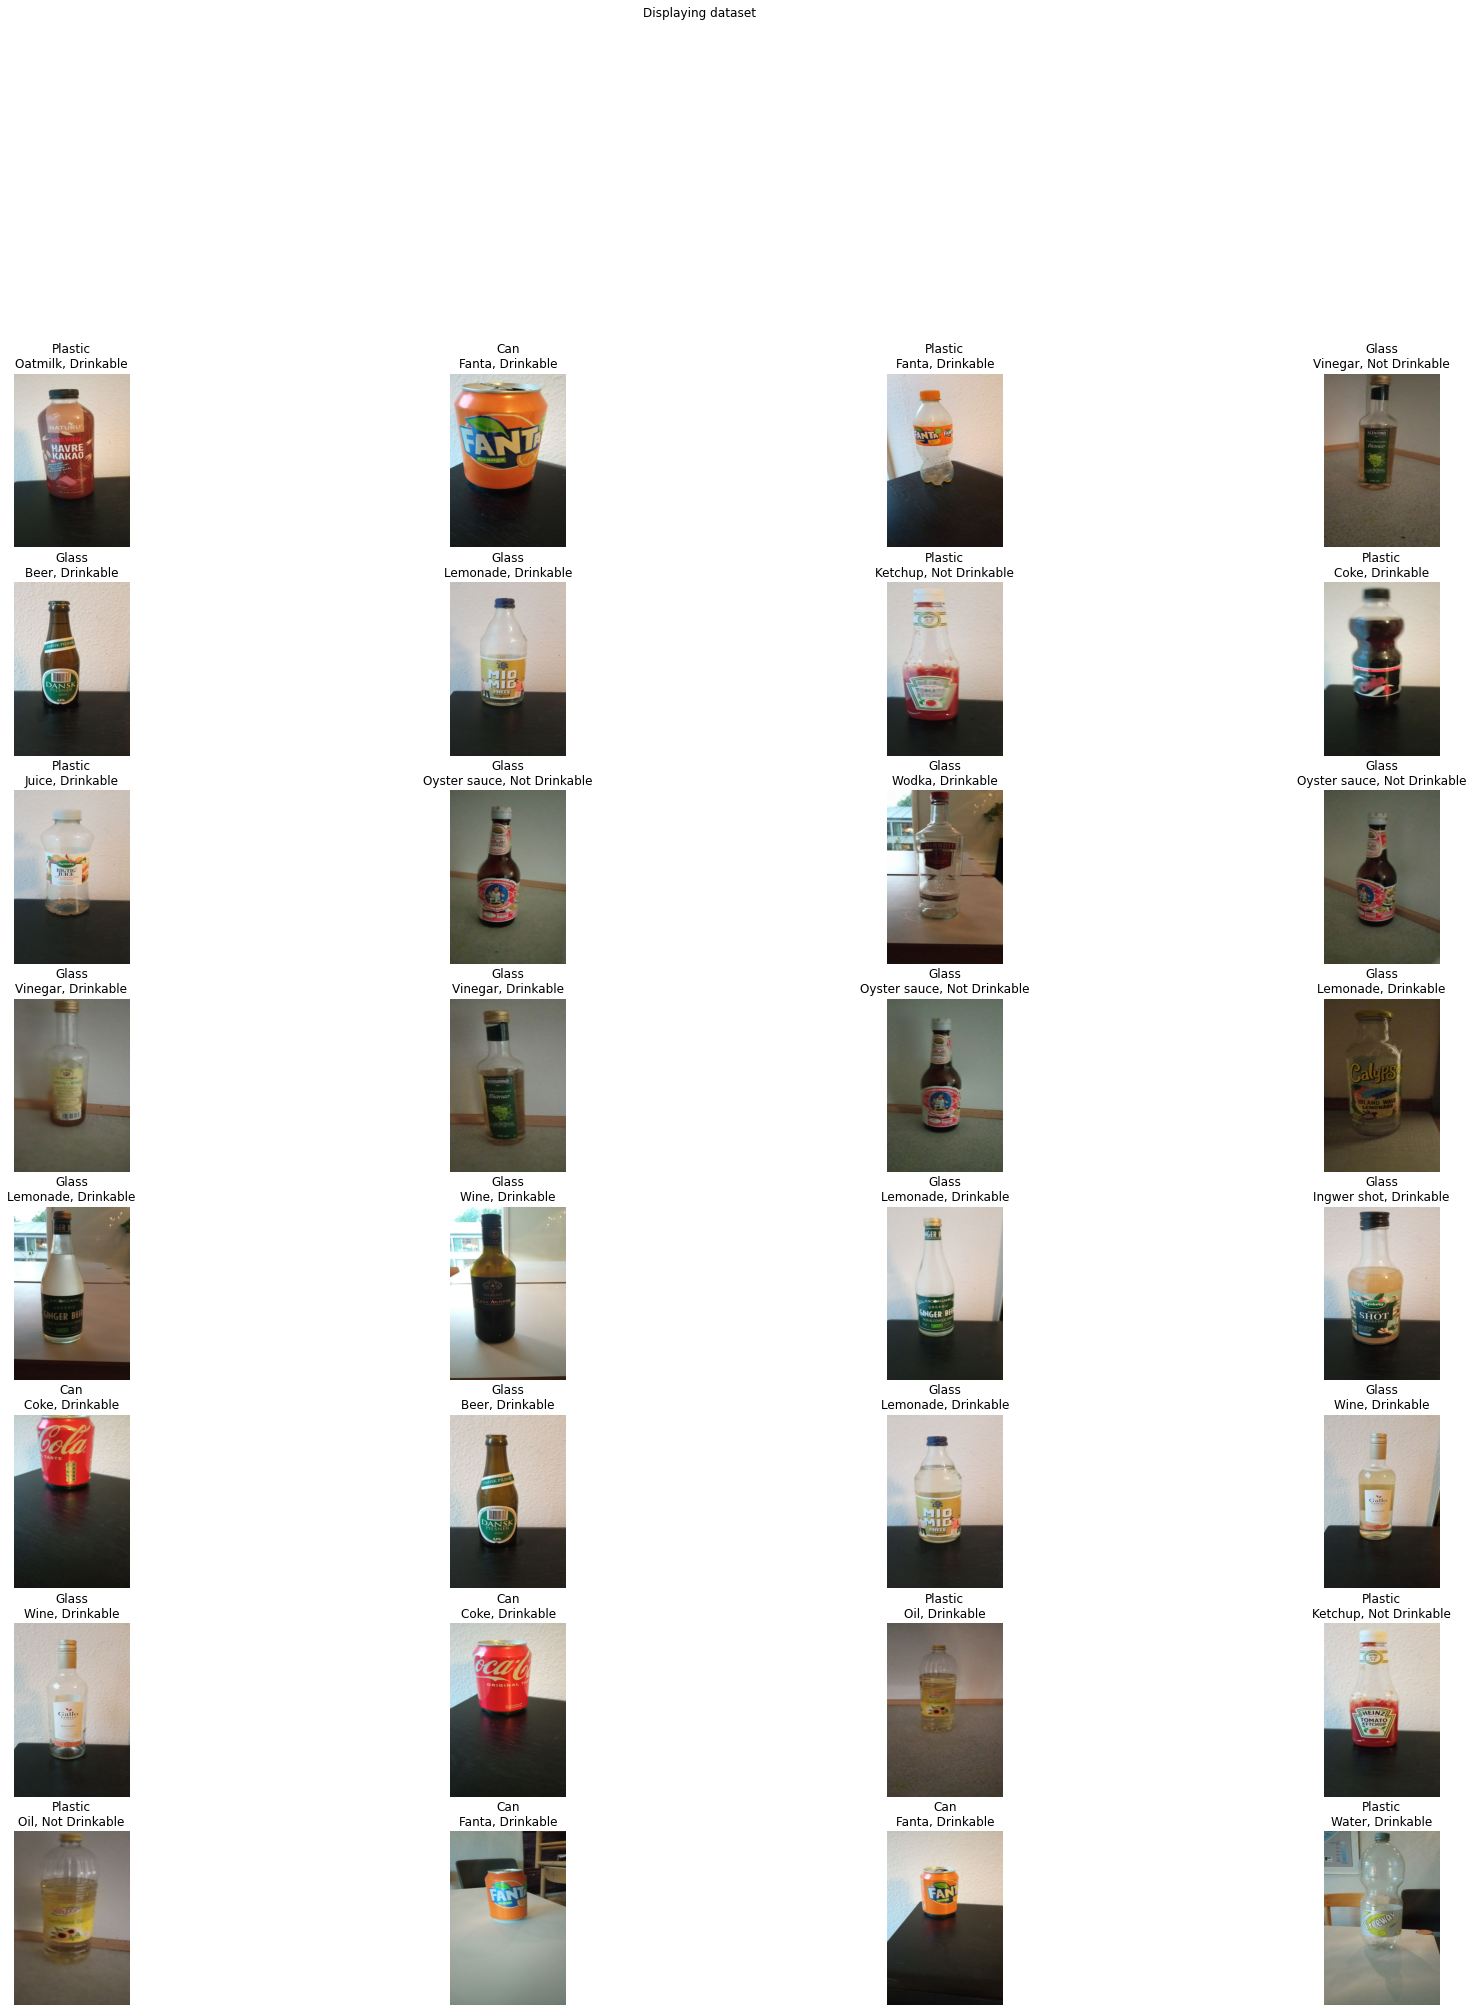

In [196]:
# Names
kind_names = ["Glass", "Plastic", "Can"]
liquid_names = ['Wodka', 'Energy drink', 'Oatmilk', 'Juice', 'Oyster sauce', 'Coke', 'Ingwer shot', 'Oil', 'Water', 'Ketchup', 'Vinegar', 'Wine', 'Fanta', 'Lemonade', 'Beer']
drinkable_names =["Drinkable", "Not Drinkable"]

# loop through whole dataset and display it
plt.figure(figsize=(30, 30))
plt.suptitle("Displaying dataset" , y=1.05)
for image, label1, label2, label3 in dataset:
  for i in range(len(label1)): 
    ax = plt.subplot(8,4, i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    subt= liquid_names[label2[i]] + ", " + drinkable_names[label3[i]]
    plt.title(kind_names[label1[i]] + "\n"+ subt)
    plt.axis("off")